In [4]:
import torch
from neuralforecast import NeuralForecast

nf = NeuralForecast.load(path='../models/neuralforecast_models')

pred = nf.predict().reset_index()

D:\miniconda3\envs\ml\lib\site-packages\pytorch_lightning\utilities\parsing.py:199: Attribute 'loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['loss'])`.
D:\miniconda3\envs\ml\lib\site-packages\pytorch_lightning\utilities\parsing.py:199: Attribute 'valid_loss' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['valid_loss'])`.
Seed set to 5
Seed set to 1
Seed set to 15
Seed set to 16
Seed set to 2
D:\miniconda3\envs\ml\lib\site-packages\neuralforecast\tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 

Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

D:\miniconda3\envs\ml\lib\site-packages\neuralforecast\core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [38]:
import pandas as pd
from sqlalchemy import create_engine


# database_url = "sqlite:////content/data.sqlite"
database_url = "sqlite:///../data/data.sqlite"
engine = create_engine(database_url)
# 从数据库读取数据
query = "select date as ds, global_entry, hkmo_entry, tw_entry from sh_visitors_daily"
df = pd.read_sql_query(query, engine, index_col='ds', parse_dates=['ds'])

# 删除指定日期范围内的数据
start_date = pd.Timestamp('2020-01-01')
end_date = pd.Timestamp('2023-06-01')

df_ori = pd.melt(df.reset_index(), id_vars=['ds'], var_name='unique_id', value_name='y')
df_ori.rename(columns={'index': 'ds'}, inplace=True)

# 使用布尔索引选择不在指定范围内的数据
df = df.loc[(df.index < start_date) | (df.index > end_date)].sort_index()

# 创建一个递减的日期索引
new_index = pd.date_range(end=df.index.max(), periods=len(df))

# 将新的日期索引应用到数据框架
df.set_index(new_index, inplace=True)

# 转换为长格式
df_long = pd.melt(df.reset_index(), id_vars=['index'], var_name='unique_id', value_name='y')
df_long.rename(columns={'index': 'ds'}, inplace=True)


In [39]:
drop_models = ["AutoAutoformer", "AutoInformer", "AutoiTransformer", "AutoLSTM"]
use_model = "AutoPatchTST"
iters = 3 # 3*60=180
df_pred = df_long.copy()
for i in range(iters):
    step = nf.predict(df_pred).reset_index()
    step = step.drop(columns=drop_models)
    step = step.rename(columns={use_model: 'y'})
    df_pred = pd.concat([df_pred, step], axis=0)
df_pred = pd.concat([df_pred, df_long], axis=0).drop_duplicates(keep=False,ignore_index=True)
df_pred.head()

D:\miniconda3\envs\ml\lib\site-packages\neuralforecast\tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\miniconda3\envs\ml\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=23` in the `DataLoader` to improve performance.


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

D:\miniconda3\envs\ml\lib\site-packages\neuralforecast\core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
D:\miniconda3\envs\ml\lib\site-packages\neuralforecast\tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\miniconda3\envs\ml\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing t

Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

D:\miniconda3\envs\ml\lib\site-packages\neuralforecast\core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
D:\miniconda3\envs\ml\lib\site-packages\neuralforecast\tsdataset.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.temporal = torch.tensor(temporal, dtype=torch.float)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
D:\miniconda3\envs\ml\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:441: The 'predict_dataloader' does not have many workers which may be a bottleneck. Consider increasing t

Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

D:\miniconda3\envs\ml\lib\site-packages\neuralforecast\core.py:184: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,unique_id,y
0,2024-02-01,global_entry,7266.827637
1,2024-02-02,global_entry,8439.663086
2,2024-02-03,global_entry,7858.574219
3,2024-02-04,global_entry,7516.814453
4,2024-02-05,global_entry,7275.518066


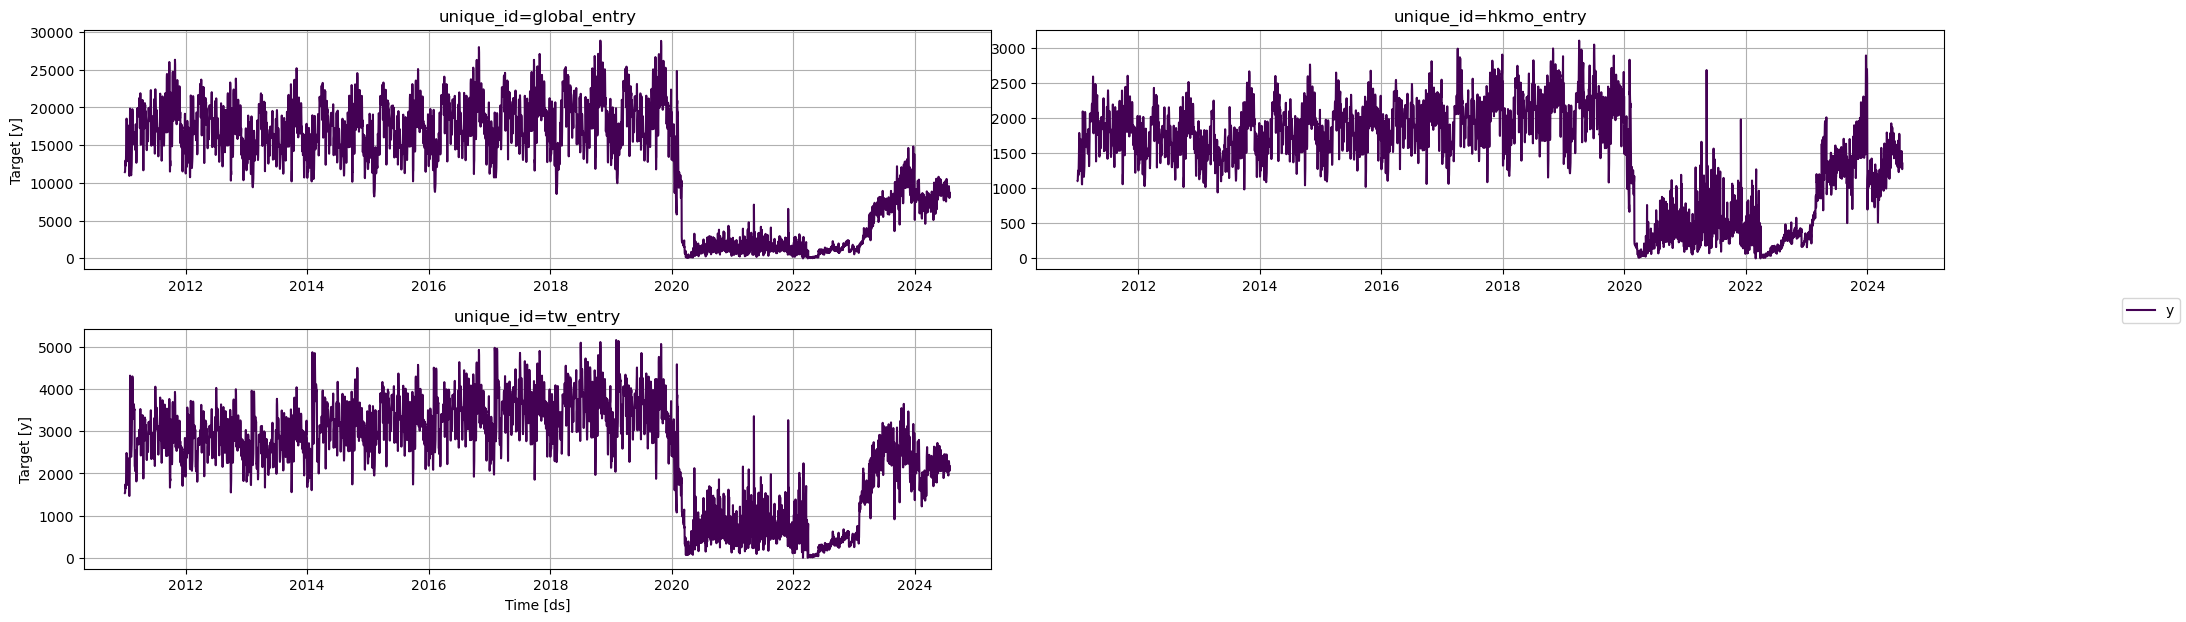

In [40]:
from utilsforecast.plotting import plot_series

plot_series(df_ori,forecasts_df=df_pred)

In [18]:
from sqlalchemy import create_engine
from neuralforecast.losses.numpy import mae, rmse, mape
import pandas as pd

model_names = ['AutoLSTM', 'AutoInformer', 'AutoAutoformer', 'AutoPatchTST', 'AutoiTransformer']


def eval_accuracy(df):
    unique_ids = df['unique_id'].unique()
    for unique_id in unique_ids:
        df_tmp = df[df['unique_id'] == unique_id]
        print(unique_id)
        y_true = df_tmp['y']
        for model_name in model_names:
            y_pred = df_tmp[model_name]
            print(
                f'{model_name} -- mae: {mae(y_true, y_pred)},rmse: {rmse(y_true, y_pred)}, mape: {mape(y_true, y_pred)}')


eval_accuracy(cross_val)

OperationalError: (sqlite3.OperationalError) near "model_evaluation": syntax error
[SQL: model_evaluation]
(Background on this error at: https://sqlalche.me/e/20/e3q8)